<a href="https://colab.research.google.com/github/vidhya2324/Machine_learning_starting_project/blob/main/House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#house prediction

In [1]:
#import neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
!kaggle datasets download -d yasserh/housing-prices-dataset

Dataset URL: https://www.kaggle.com/datasets/yasserh/housing-prices-dataset
License(s): CC0-1.0
  0% 0.00/4.63k [00:00<?, ?B/s]
100% 4.63k/4.63k [00:00<00:00, 5.70MB/s]


In [3]:
!unzip \*.zip && rm *.zip

Archive:  housing-prices-dataset.zip
  inflating: Housing.csv             


In [4]:
House_predict=pd.read_csv("/content/Housing.csv")


In [5]:
House_predict.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
House_predict.shape

(545, 13)

In [7]:
House_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [9]:
House_predict.isnull().sum()


,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [10]:
House_predict.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


#Data prepocessing

In [13]:
House_predict.iloc[:, 8].value_counts()

,count
hotwaterheating,
no,520
yes,25


In [14]:
House_predict.iloc[:, 6].value_counts()

,count
guestroom,
no,448
yes,97


In [17]:
#here i use the pd.dummies(one hot encoding)...instead you can use the replace function also
objcols=House_predict.select_dtypes(include="object").columns
House_predict=pd.get_dummies(House_predict,columns=objcols)

In [19]:
House_predict.shape

(545, 21)

In [21]:
#Correlation
correlation=House_predict.corr()

<Axes: >

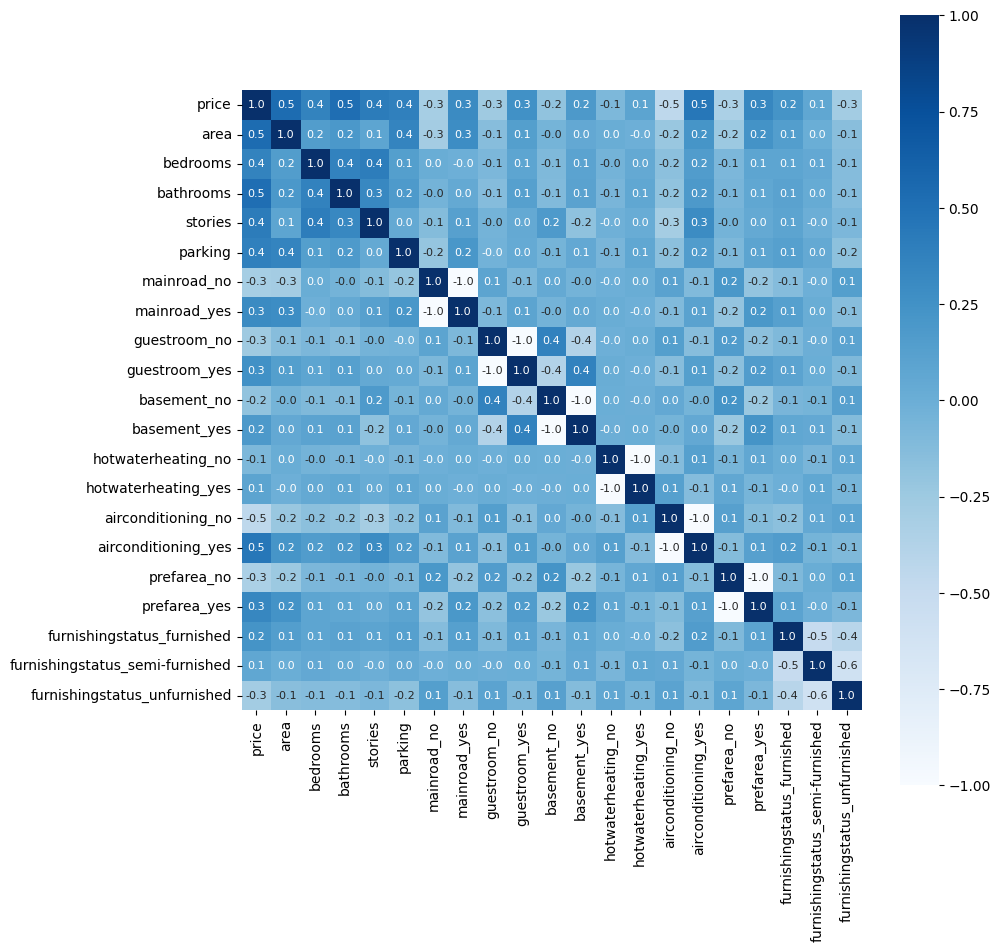

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation,cbar=True,square=True,fmt=".1f",annot=True,annot_kws={'size':8},cmap="Blues")

#Model evaluation

In [27]:
x=House_predict.drop(['price'],axis=1)
y=House_predict["price"]

In [28]:
print(x)
print(y)

     area  bedrooms  bathrooms  stories  parking  mainroad_no  mainroad_yes  \
0    7420         4          2        3        2        False          True   
1    8960         4          4        4        3        False          True   
2    9960         3          2        2        2        False          True   
3    7500         4          2        2        3        False          True   
4    7420         4          1        2        2        False          True   
..    ...       ...        ...      ...      ...          ...           ...   
540  3000         2          1        1        2        False          True   
541  2400         3          1        1        0         True         False   
542  3620         2          1        1        0        False          True   
543  2910         3          1        1        0         True         False   
544  3850         3          1        2        0        False          True   

     guestroom_no  guestroom_yes  basement_no  base

In [29]:
#splitting the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [30]:
print(x.shape,x_train.shape,x_test.shape)

(545, 20) (436, 20) (109, 20)


#model training

In [31]:
#loading the model
model=XGBRegressor()

In [33]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

#Prediction

In [36]:
training_data_prediction=model.predict(x_train)

In [37]:
print(training_data_prediction)

[ 3437637.5  4266591.   2668082.5  4787158.   4200143.   6989735.5
  2939936.5  2664837.2  6930625.5  4766770.   3323263.8  2949949.2
  6027032.5  5817667.   7800610.   4129446.5  5198711.5  4634231.5
  7822496.5  4230385.5  4177434.8  2658310.5  5234440.   4378945.
  3920028.2  4029942.5  6796436.5  9233010.   4665360.5  3161739.8
  3771301.8  3067605.5  2373787.2  4022908.   4262040.   2907373.2
  4880897.   3655500.   1917677.5  7985126.5  4092745.  12187961.
  8527664.   7397872.5  4025292.5  3215165.2  4296617.   3597510.8
  3375032.5  2506003.   5914839.5  4022023.5  3861385.5  3209968.8
  4135265.8  5314606.5  3640324.   3809019.8  3624571.5  4196324.
  7481135.   4265552.   5931341.   2788854.8  3803684.8  5540266.5
  6672290.5  5862087.5  5498747.   5596531.5  3316246.5  3617889.8
  2822821.   4869773.   5257766.   3721025.   5894736.5  4226604.5
  6762519.   5394233.   3085471.5  3579544.5  6656209.   4917530.5
  5876136.5  8387199.   2717370.2  3278769.   9782583.   4127400.

In [38]:
# accuracy prediction for train dataset
#R squared error
score1=metrics.r2_score(y_train,training_data_prediction)

# Mean absolute error
score2=metrics.mean_absolute_error(y_train,training_data_prediction)

In [39]:
print(score1)
print(score2)

0.9975635017896027
47851.17775229358


In [40]:
test_data_prediction=model.predict(x_test)

In [41]:
# accuracy prediction for train dataset
#R squared error
score1=metrics.r2_score(y_test,test_data_prediction)

# Mean absolute error
score2=metrics.mean_absolute_error(y_test,test_data_prediction)

In [42]:
print(score1)
print(score2)

0.4203008488891784
975532.752293578


#visualization for actual price and predicted price

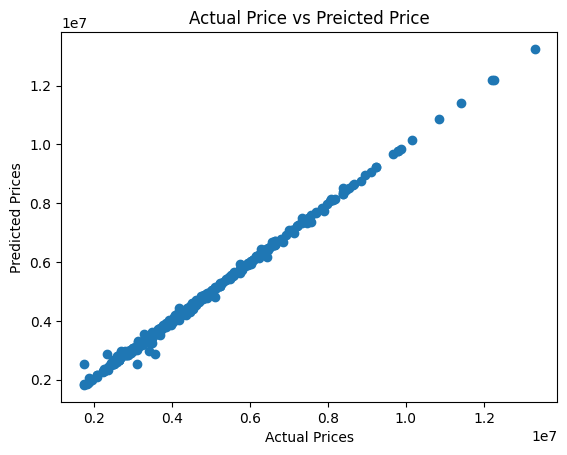

In [44]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()